# Stock data

Import data from an API and analyze it. No we won't buy or sell stocks :P

Introduces APIs and time series.

See

- [https://www.alphavantage.co/](https://www.alphavantage.co/)

- [https://www.alphavantage.co/documentation/](https://www.alphavantage.co/documentation/)



In [26]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

In [29]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

# https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo
# Change "demo" to our api key
# THis will get IBM's stocks, eg Apples write AAPL

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url)
data
# SHould give responst [200], that fine then :)


<Response [200]>

In [31]:
# Get data in json format
data = requests.get(url).json()
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2021-10-29',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2021-10-29': {'1. open': '147.2150',
   '2. high': '149.9400',
   '3. low': '146.4128',
   '4. close': '149.8000',
   '5. volume': '124953168'},
  '2021-10-28': {'1. open': '149.8200',
   '2. high': '153.1650',
   '3. low': '149.7200',
   '4. close': '152.5700',
   '5. volume': '100077888'},
  '2021-10-27': {'1. open': '149.3600',
   '2. high': '149.7300',
   '3. low': '148.4900',
   '4. close': '148.8500',
   '5. volume': '56094929'},
  '2021-10-26': {'1. open': '149.3300',
   '2. high': '150.8400',
   '3. low': '149.0101',
   '4. close': '149.3200',
   '5. volume': '60893395'},
  '2021-10-25': {'1. open': '148.6800',
   '2. high': '149.3700',
   '3. low': '147.6211',
   '4. close': '148.6400',
   '5. volume': '50720556'},
  '2021-10-22': {'1. open': 

In [32]:
# data is a dictionary, keys are
# meta data
# time series daily
# and then dates within this

# So we can access
data['Time Series (Daily)']



{'2021-10-29': {'1. open': '147.2150',
  '2. high': '149.9400',
  '3. low': '146.4128',
  '4. close': '149.8000',
  '5. volume': '124953168'},
 '2021-10-28': {'1. open': '149.8200',
  '2. high': '153.1650',
  '3. low': '149.7200',
  '4. close': '152.5700',
  '5. volume': '100077888'},
 '2021-10-27': {'1. open': '149.3600',
  '2. high': '149.7300',
  '3. low': '148.4900',
  '4. close': '148.8500',
  '5. volume': '56094929'},
 '2021-10-26': {'1. open': '149.3300',
  '2. high': '150.8400',
  '3. low': '149.0101',
  '4. close': '149.3200',
  '5. volume': '60893395'},
 '2021-10-25': {'1. open': '148.6800',
  '2. high': '149.3700',
  '3. low': '147.6211',
  '4. close': '148.6400',
  '5. volume': '50720556'},
 '2021-10-22': {'1. open': '149.6900',
  '2. high': '150.1800',
  '3. low': '148.6400',
  '4. close': '148.6900',
  '5. volume': '58883443'},
 '2021-10-21': {'1. open': '148.8100',
  '2. high': '149.6400',
  '3. low': '147.8700',
  '4. close': '149.4800',
  '5. volume': '61420990'},
 '20

In [14]:
# And from this we can create a data frame!
# Transpose to get the dates as an index (instead of columns) :)
df_aapl = pd.DataFrame(data['Time Series (Daily)']).transpose()
df_aapl.head()


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.2150,149.9400,146.4128,149.8000,124953168
2021-10-28,149.8200,153.1650,149.7200,152.5700,100077888
2021-10-27,149.3600,149.7300,148.4900,148.8500,56094929
2021-10-26,149.3300,150.8400,149.0101,149.3200,60893395
2021-10-25,148.6800,149.3700,147.6211,148.6400,50720556


In [17]:
df_aapl.info() # Ok so all are objects and not number
df_aapl = df_aapl.astype(float)
df_aapl.info() # Now they are floats

<class 'pandas.core.frame.DataFrame'>
Index: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    5536 non-null   object
 1   2. high    5536 non-null   object
 2   3. low     5536 non-null   object
 3   4. close   5536 non-null   object
 4   5. volume  5536 non-null   object
dtypes: object(5)
memory usage: 259.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5536 non-null   float64
 1   2. high    5536 non-null   float64
 2   3. low     5536 non-null   float64
 3   4. close   5536 non-null   float64
 4   5. volume  5536 non-null   float64
dtypes: float64(5)
memory usage: 259.5+ KB


In [20]:
df_aapl.index # These are not dates! These are objects...
# We need to change these to datetime objects(?)
df_aapl.index = pd.to_datetime(df_aapl.index) # Now they are datetime!
df_aapl.index


DatetimeIndex(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26',
               '2021-10-25', '2021-10-22', '2021-10-21', '2021-10-20',
               '2021-10-19', '2021-10-18',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              dtype='datetime64[ns]', length=5536, freq=None)

In [22]:
# NOw we are talking, we can extract only data for a year!
df_aapl.loc["2021"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
...,...,...,...,...,...
2021-01-08,132.430,132.6300,130.2300,132.05,105158245.0
2021-01-07,128.360,131.6300,127.8600,130.92,109578157.0
2021-01-06,127.720,131.0499,126.3820,126.60,155087970.0
2021-01-05,128.890,131.7400,128.4300,131.01,97664898.0


In [23]:
# Or all from 2021 october
df_aapl.loc["2021-10"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
2021-10-22,149.690,150.1800,148.6400,148.69,58883443.0
2021-10-21,148.810,149.6400,147.8700,149.48,61420990.0
2021-10-20,148.700,149.7539,148.1200,149.26,58418788.0
2021-10-19,147.010,149.1700,146.5500,148.76,76378894.0
2021-10-18,143.445,146.8400,143.1600,146.55,85589175.0


In [25]:
# Or a range, we can slice with the dates
df_aapl.loc["2021-10-15":"2021-10-29"]

# We can computewith the dates, extract "last week" and things like that with time delta.

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
2021-10-22,149.690,150.1800,148.6400,148.69,58883443.0
2021-10-21,148.810,149.6400,147.8700,149.48,61420990.0
2021-10-20,148.700,149.7539,148.1200,149.26,58418788.0
2021-10-19,147.010,149.1700,146.5500,148.76,76378894.0
2021-10-18,143.445,146.8400,143.1600,146.55,85589175.0


In [34]:
# Now we want other companies
symbols = ["AAPL", "TSLA", "NVDA","IBM"]
stock_list = []

for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data['Time Series (Daily)']).transpose()
    # So we have several things here
    # We rename the column 4.close to the name of the company
    # change to floats
    df = df["4. close"].rename(symbol).astype(float)
    # and add dataframes to a list
    stock_list.append(df)
    # Add time sleep to pause 10second between each import
    time.sleep(60)

# Check results
stock_list


KeyError: 'Time Series (Daily)'

In [45]:
# Ok this won't work so we download the csv file Fredrik made
stocks = pd.read_csv("../data/stocks.csv", index_col=0, parse_dates=True)
stocks = stocks.astype(float)
#stocks = pd.DataFrame(stock_list, axis=1)
#stocks.to_csv("../data/stocks.csv")
stocks.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5536 non-null   float64
 1   TSLA    2856 non-null   float64
 2   NVDA    5536 non-null   float64
 3   IBM     5536 non-null   float64
dtypes: float64(4)
memory usage: 216.2 KB


Text(0.5, 1.05, 'Stocks during 2021')

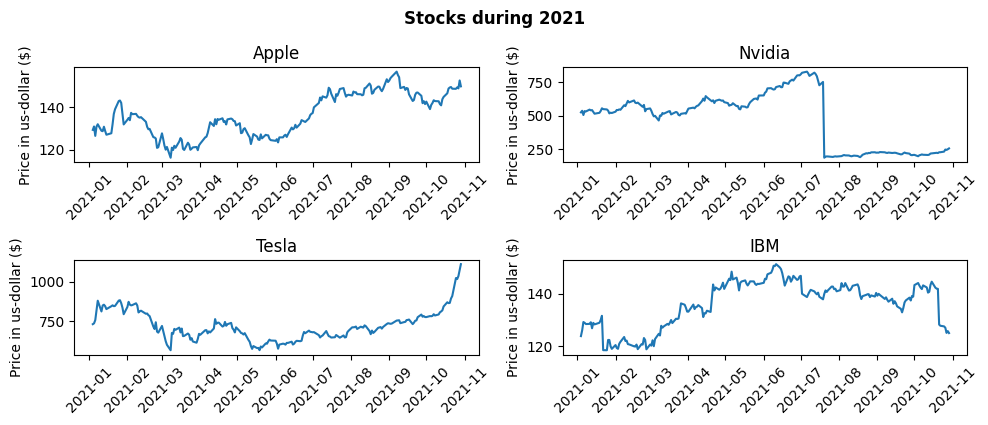

In [59]:
# Plot som stock data
fig, axes = plt.subplots(2,2, figsize=(10,4), dpi=100)

# To be able to loop through ax:
axes.flatten().shape
# Much easier than what I did :P

# Plot some stocks
stock_names = dict(
    AAPL = "Apple",
    NVDA = "Nvidia",
    TSLA = "Tesla",
    IBM = "IBM"
)

stocks_2021 = stocks.loc['2021']

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2021, x=stocks_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in us-dollar ($)")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.05, fontweight="bold")
fig.savefig("lect04_stocks.png", facecolor="white")



